In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('books_cleaned.csv')
df = df.dropna(how='any')
df.columns = df.columns.str.strip()

df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333.0,244.0,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435.0,2339585.0,36325.0,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690.0,41428.0,164.0,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512.0,156.0,20.0,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9.780140e+12,eng,635.0,783.0,56.0,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9.780140e+12,eng,415.0,820.0,95.0,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9.780061e+12,eng,434.0,769.0,139.0,2/27/2007,Ecco


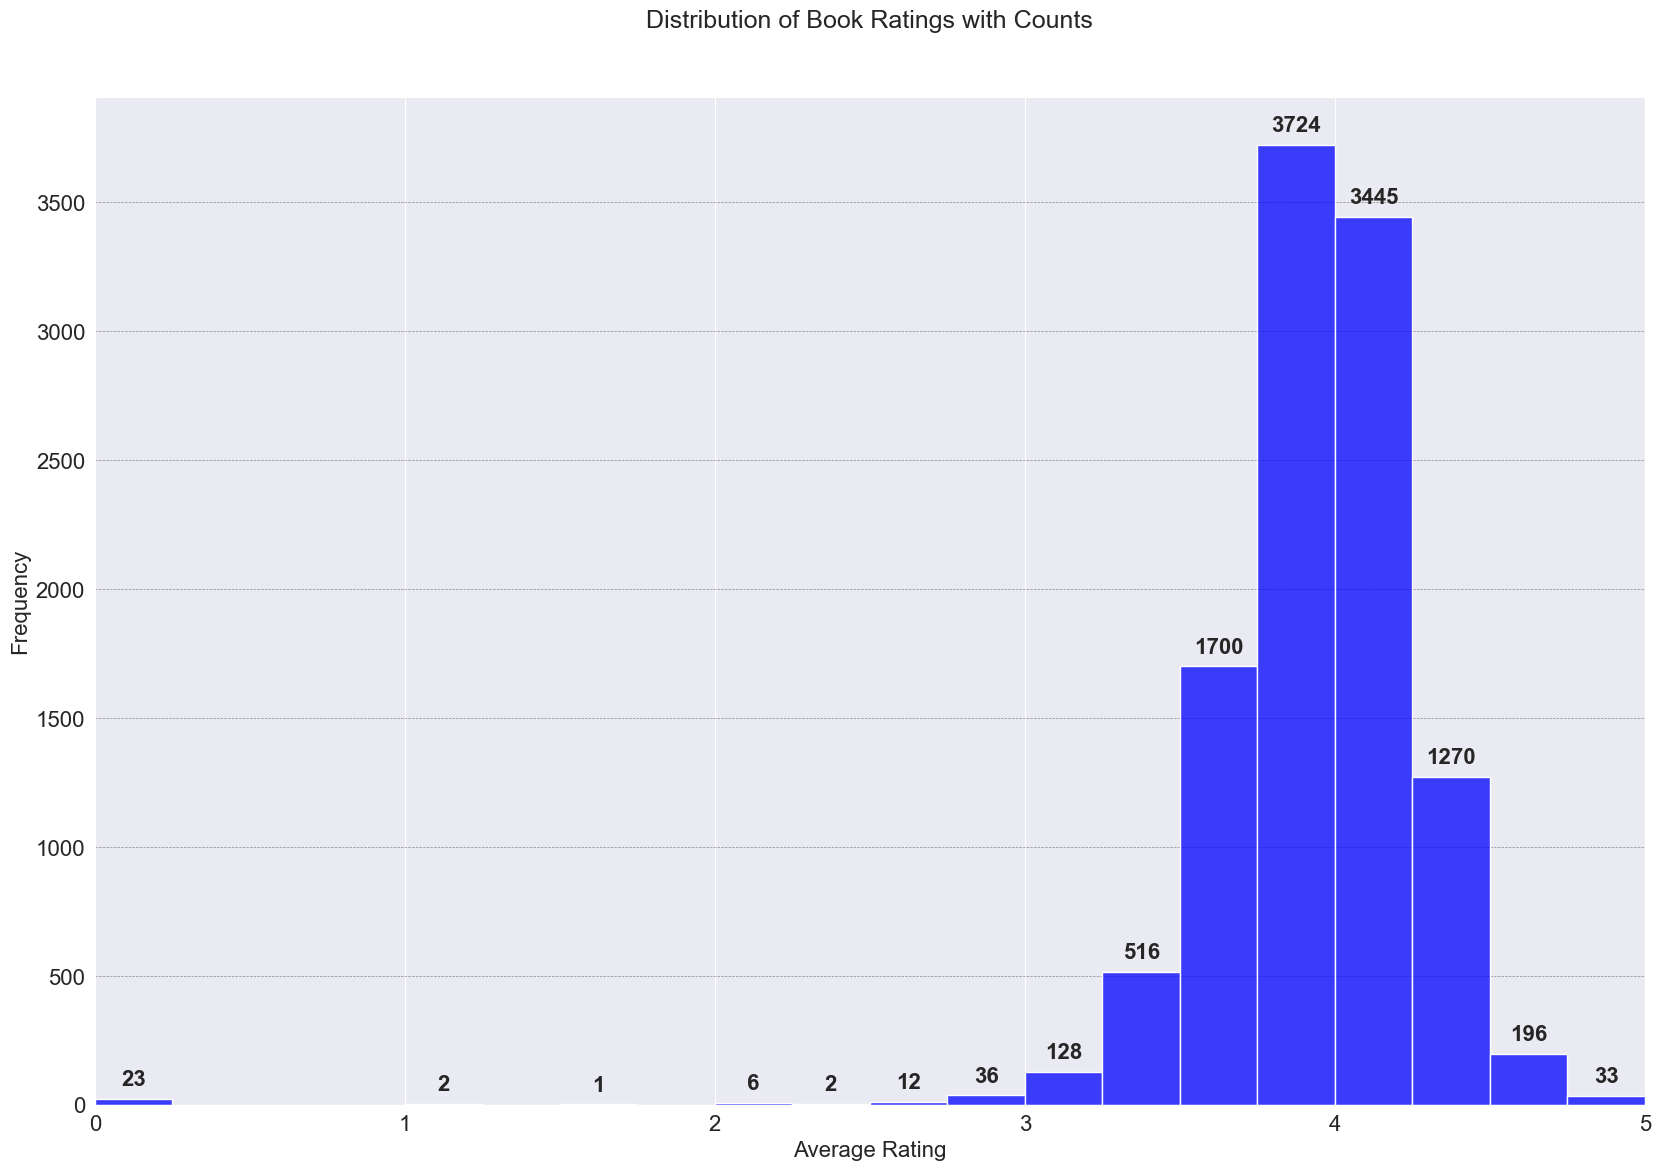

In [2]:
plt.figure(figsize=(20, 12))
ax = sns.histplot(df['average_rating'], bins=20, color='blue')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(x=p.get_x() + p.get_width()/2, 
                y=height + 0.01*max([p.get_height() for p in ax.patches]),
                s=f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=16,
                fontweight='bold')

# Style the plot
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim([0, 5])

plt.grid(axis='y',
         linestyle='--',
         linewidth=0.5,  
         alpha=0.9,      
         color='gray')  

plt.subplots_adjust(top=0.95)

plt.title('Distribution of Book Ratings with Counts', fontsize=18, pad=50)
plt.show()

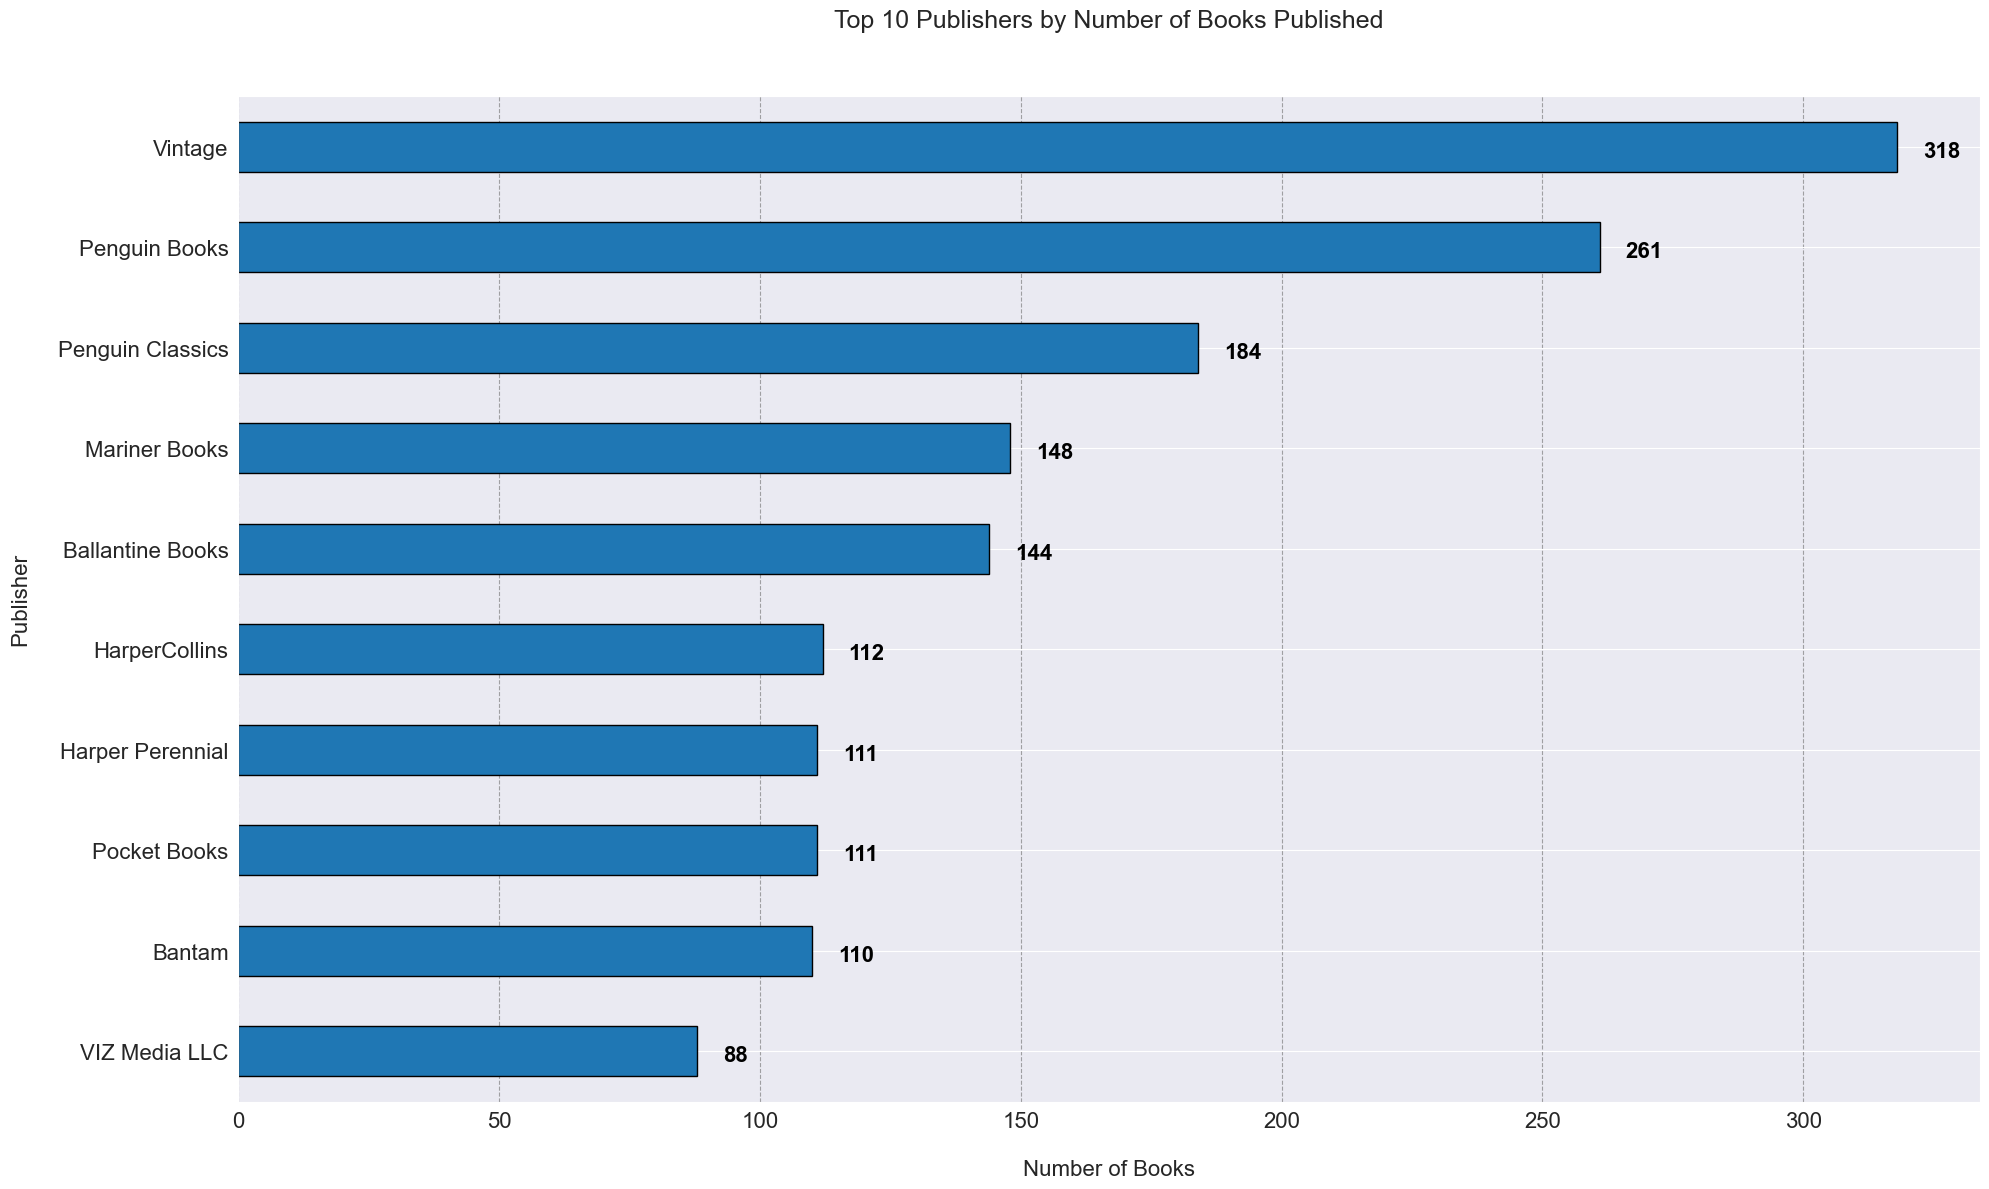

In [3]:
plt.figure(figsize=(20, 12))
top_publishers = df['publisher'].value_counts().nlargest(10).sort_values()
ax = top_publishers.plot(kind='barh', color='#1f77b4', edgecolor='black')

# Value labels
for i, v in enumerate(top_publishers):
    ax.text(v + 5, i - 0.1, str(v),
            color='black', fontsize=16, fontweight='bold')

# Styling
plt.xlabel('Number of Books', fontsize=16, labelpad=20)
plt.ylabel('Publisher', fontsize=16, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')
plt.title('Top 10 Publishers by Number of Books Published', fontsize=18, pad=50)
plt.tight_layout()
plt.show()

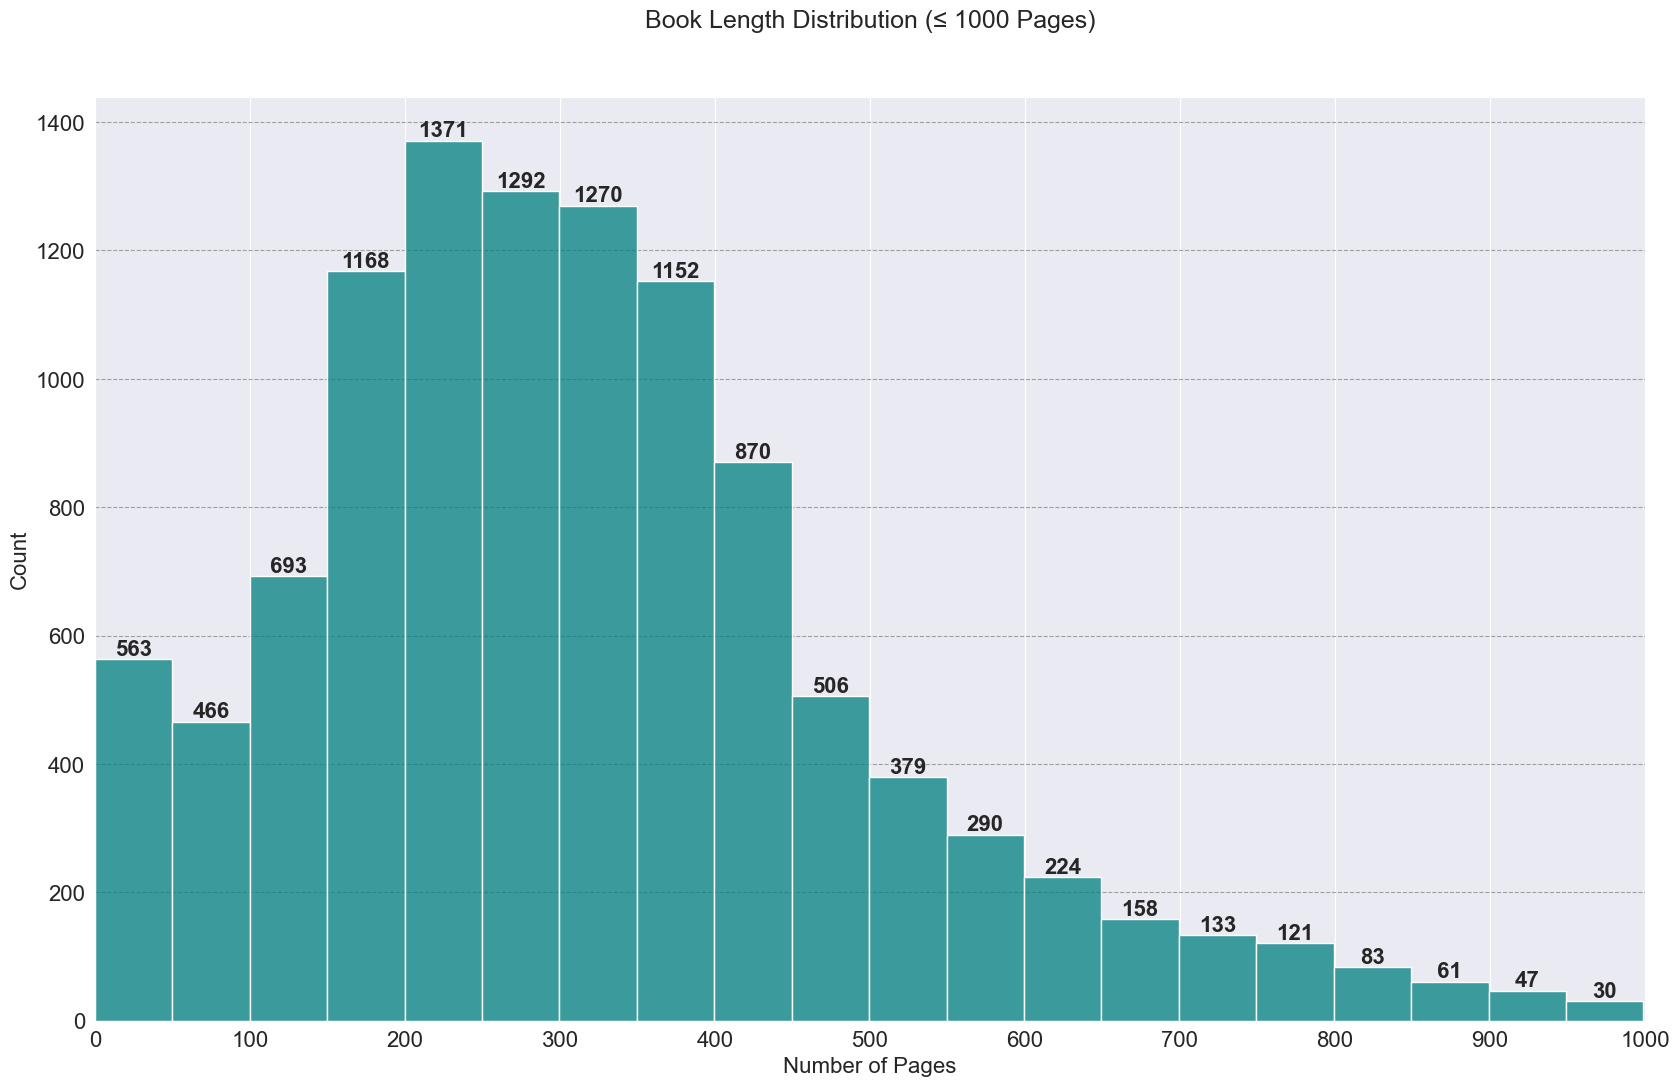

In [4]:
plt.figure(figsize=(20, 12))

filtered_df = df[df['num_pages'] <= 1000]

ax = sns.histplot(filtered_df['num_pages'], bins=20, color='teal')

for p in ax.patches:
    if p.get_height() > 0:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(),
                f'{int(p.get_height())}',
                ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.xticks(np.arange(0, 1001, 100), fontsize=16)
plt.xlabel('Number of Pages', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0, 1000])
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.title('Book Length Distribution (≤ 1000 Pages)', fontsize=18, pad=50)

plt.show()

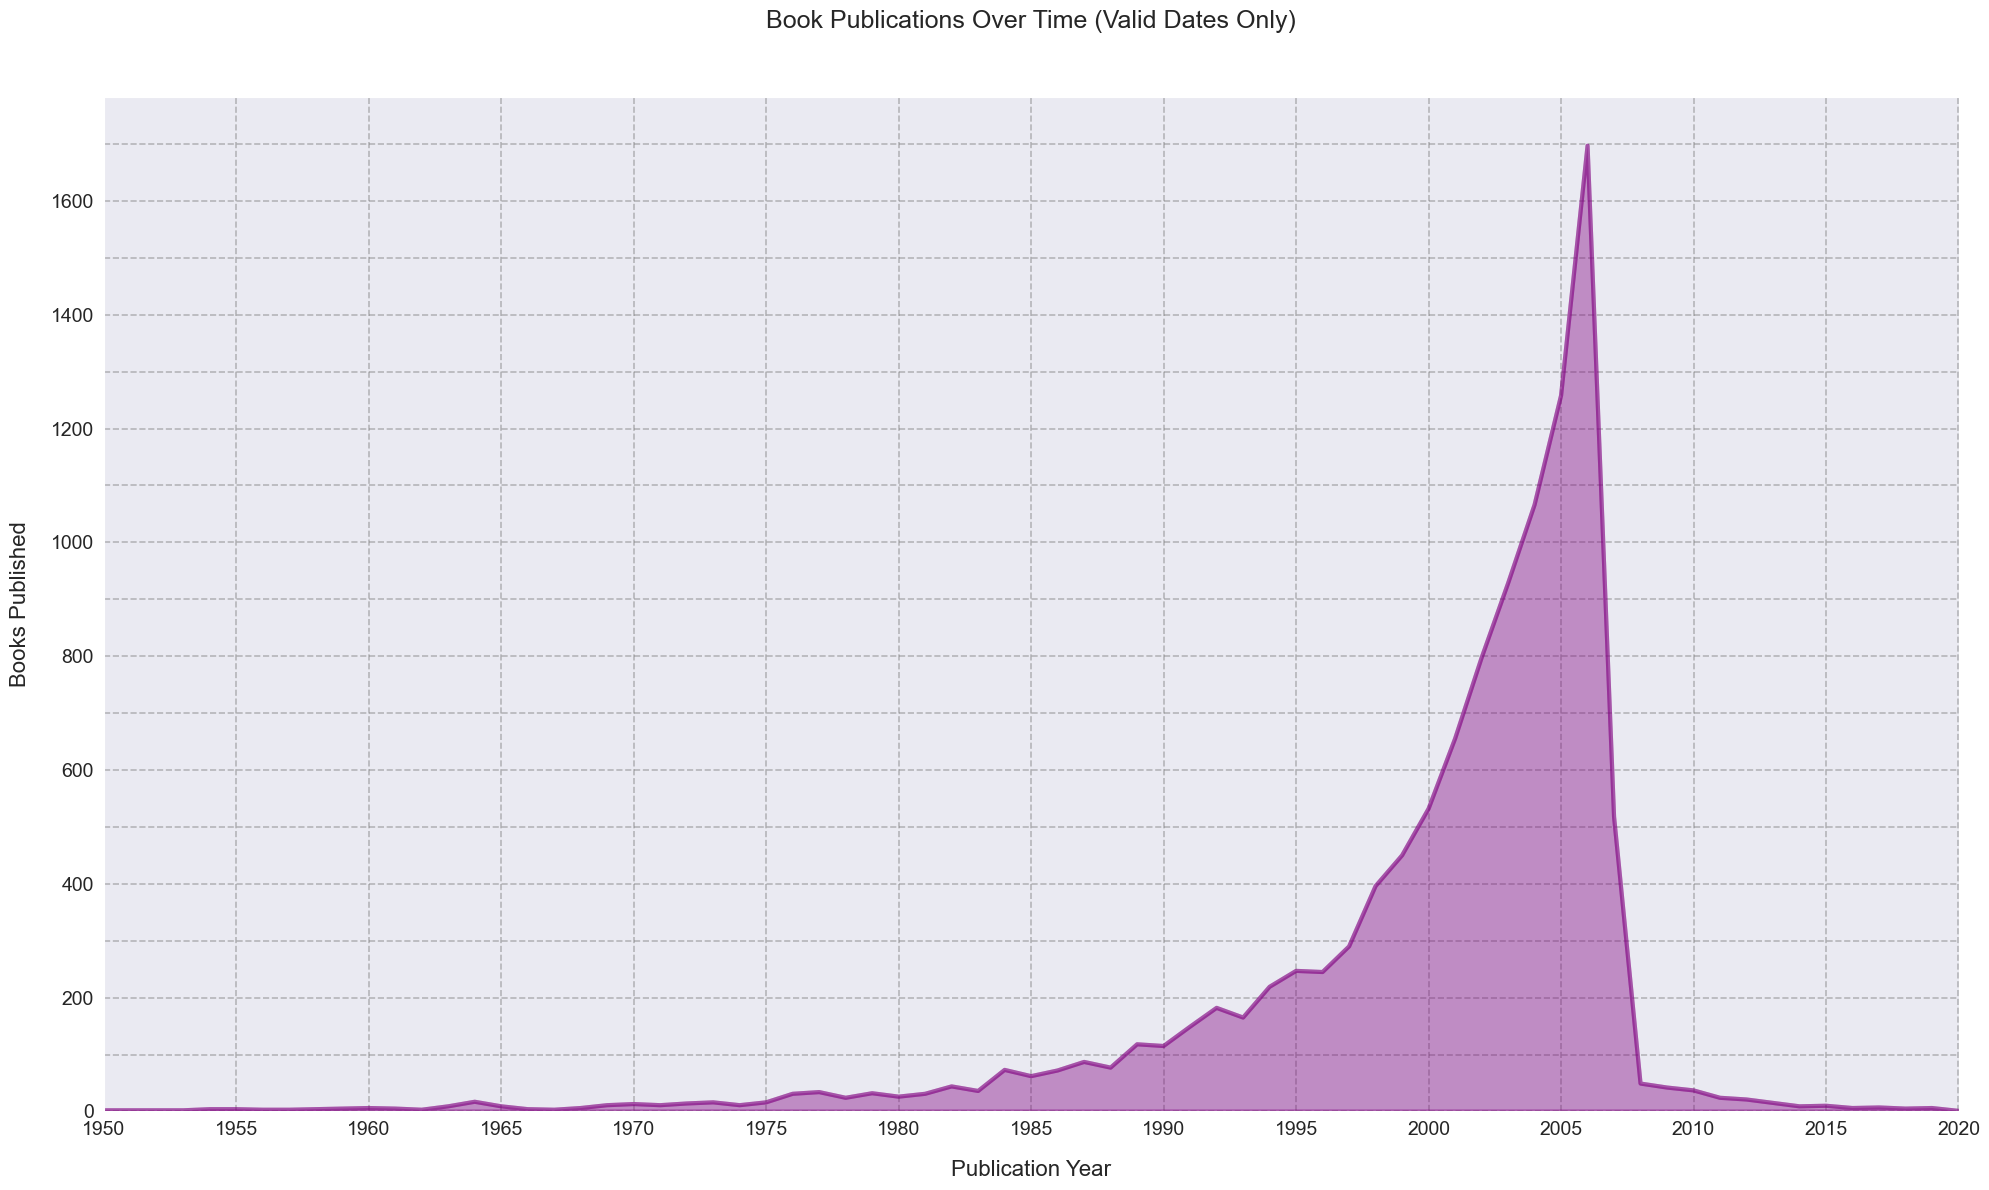

In [5]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 12))

df['year'] = pd.to_datetime(
    df['publication_date'],
    errors='coerce',
    format='mixed'
).dt.year

df_clean = df.dropna(subset=['year'])

year_counts = df_clean['year'].value_counts().sort_index().loc[1900:2020]

ax = year_counts.plot(kind='area', color='purple', alpha=0.4, linewidth=3)

plt.grid(which='both', linestyle='--', alpha=0.5, linewidth=1.2, color='gray')

plt.xticks(np.arange(1900, 2021, 5), fontsize=14)
plt.yticks(fontsize=14)

ax.xaxis.set_minor_locator(ticker.MultipleLocator(5)) 
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))  

plt.xlabel('Publication Year', fontsize=16, labelpad=15)
plt.ylabel('Books Published', fontsize=16, labelpad=15)
plt.title('Book Publications Over Time (Valid Dates Only)', fontsize=18, pad=50)
plt.xlim(1950, 2020)

plt.tight_layout()
plt.show()

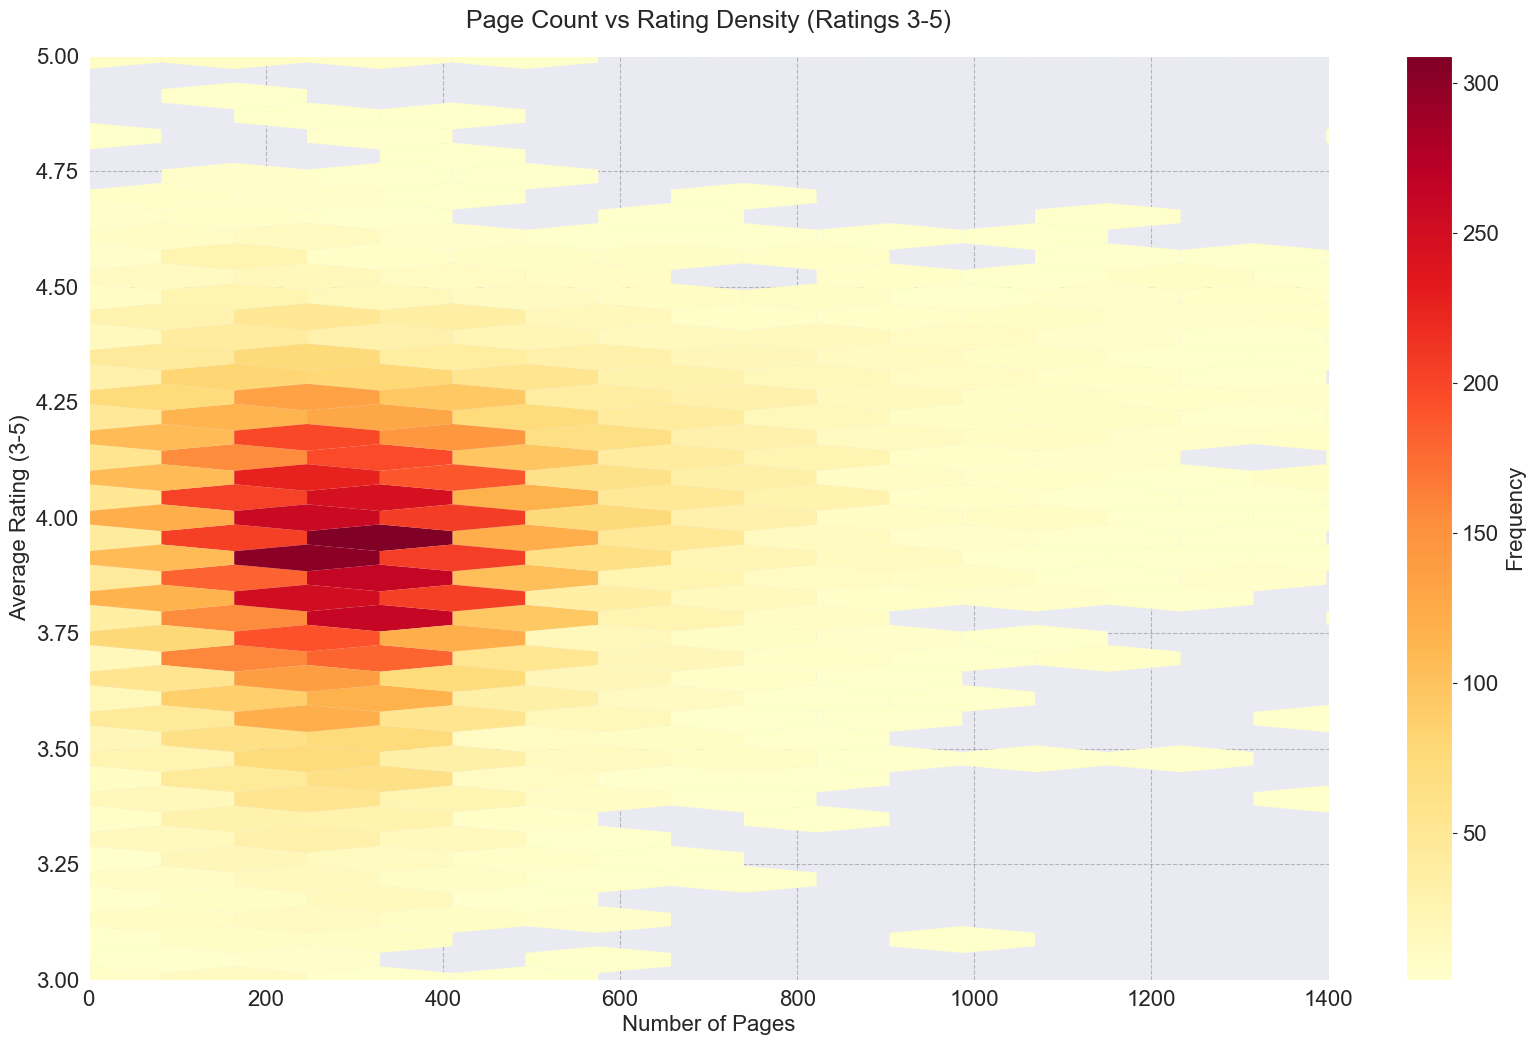

In [6]:
filtered_df = df[(df['average_rating'] >= 3) & (df['average_rating'] <= 5)]


plt.figure(figsize=(20, 12))
hb = plt.hexbin(filtered_df['num_pages'], filtered_df['average_rating'],
                gridsize=40, cmap='YlOrRd',
                mincnt=1, edgecolors='none')

# Add colorbar
cb = plt.colorbar(hb)
cb.set_label('Frequency', fontsize=16)
cb.ax.tick_params(labelsize=16)

plt.xlabel('Number of Pages', fontsize=16)
plt.ylabel('Average Rating (3-5)', fontsize=16)
plt.xlim(0, 1400)
plt.ylim(3, 5)
plt.title('Page Count vs Rating Density (Ratings 3-5)', fontsize=18, pad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='--', alpha=0.5, color='gray')
plt.show()

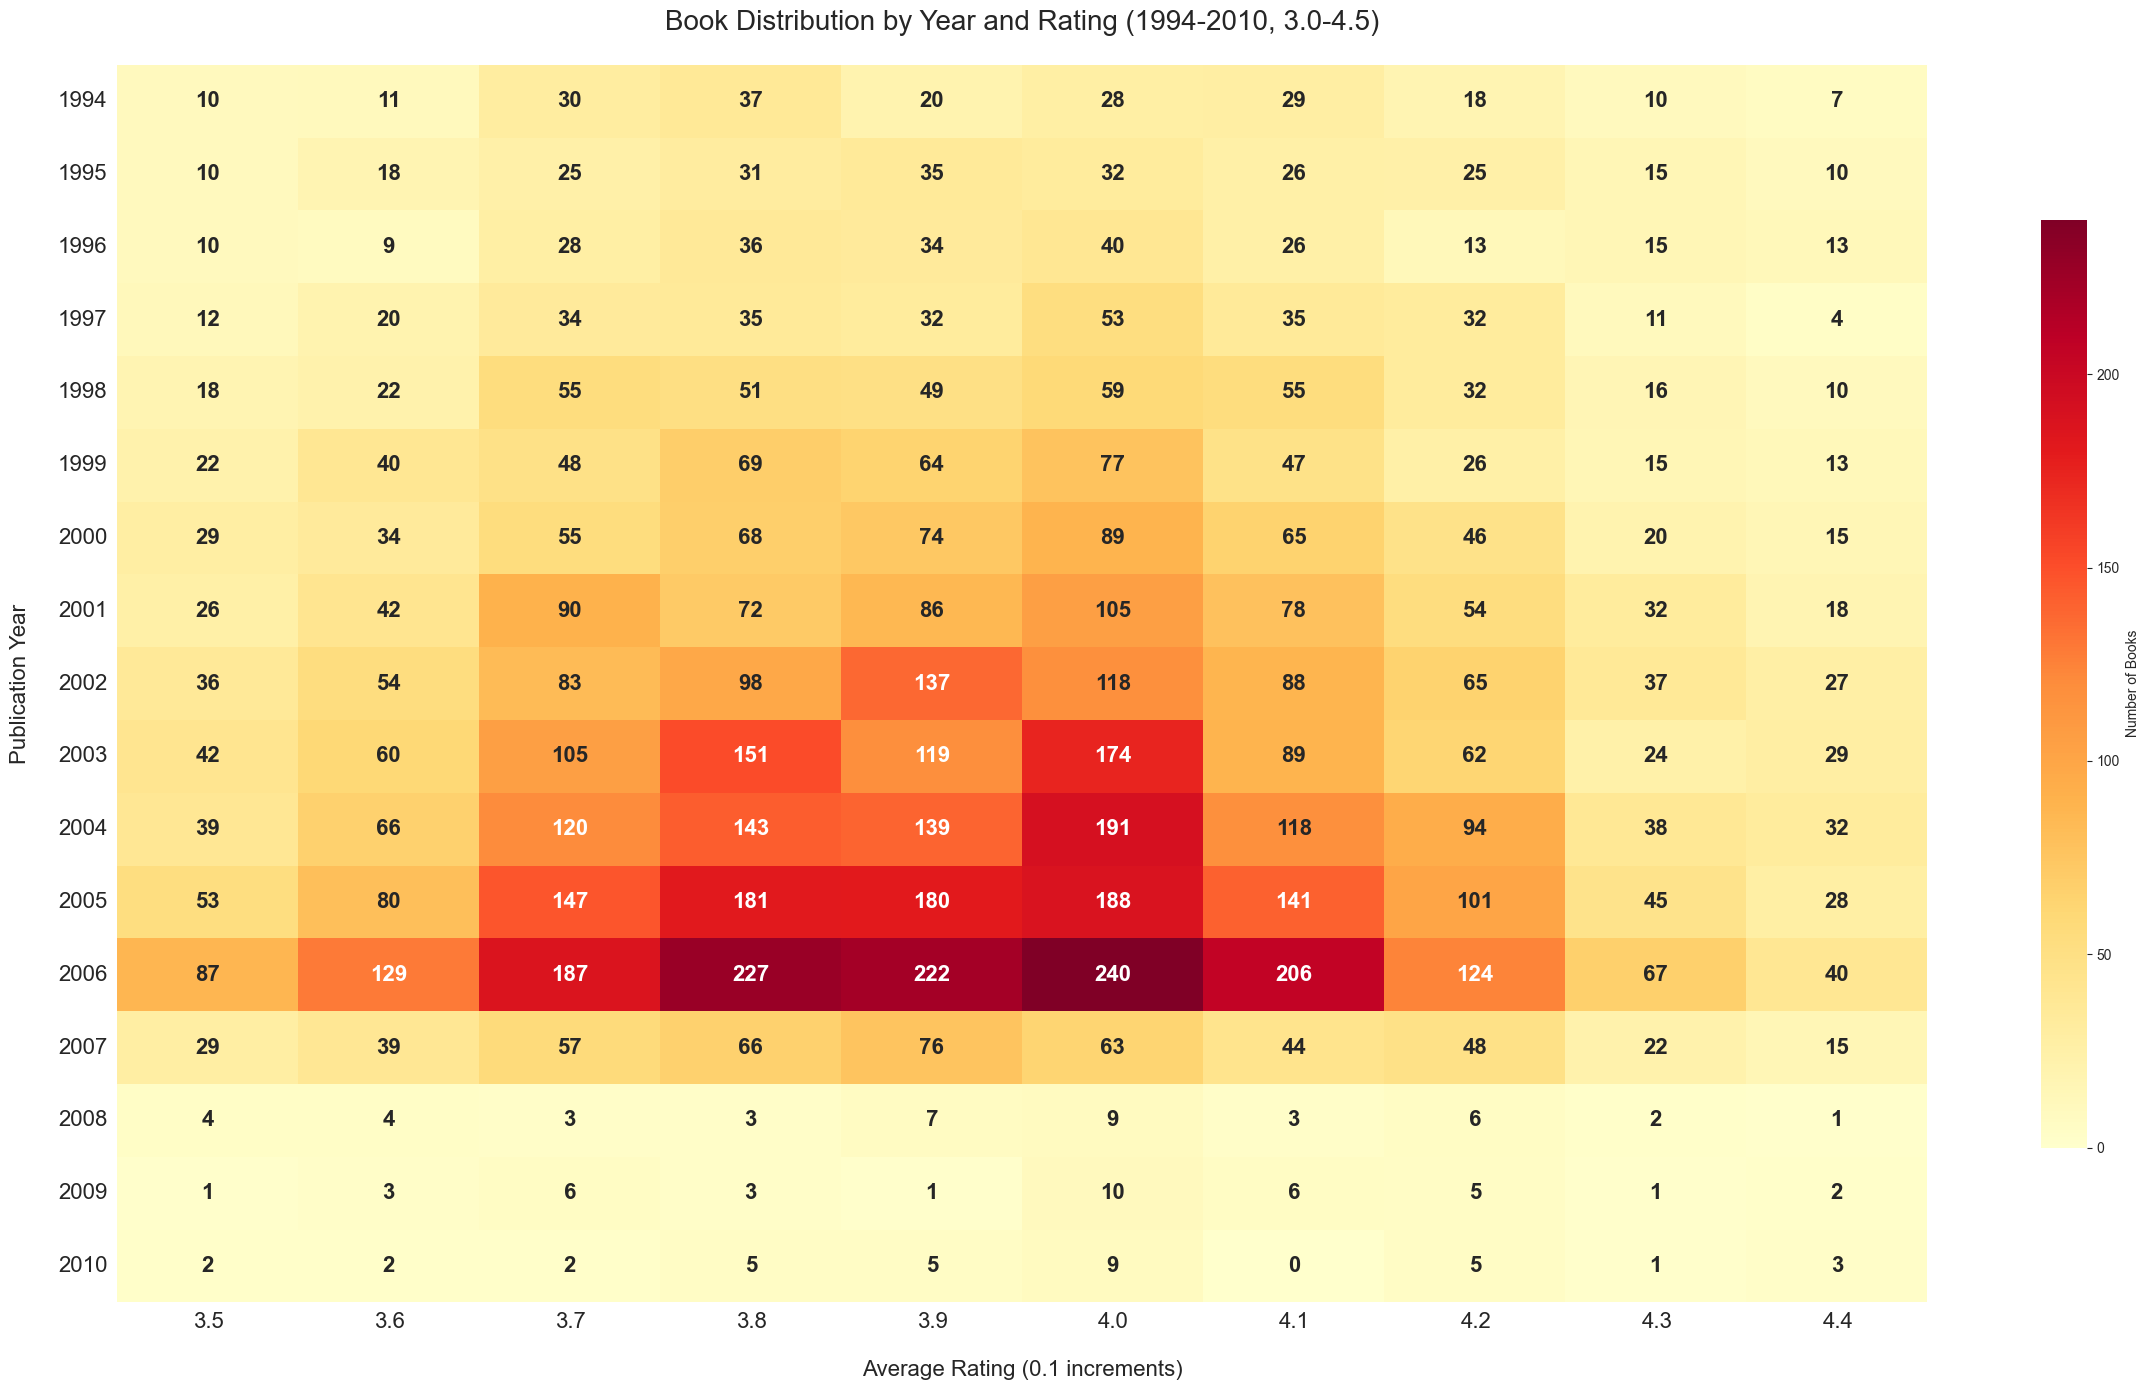

In [7]:
plt.figure(figsize=(24, 14))  # Increased figure size for better readability

# Data processing
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce', format='mixed')
df = df.dropna(subset=['publication_date'])

# Filter data
df = df[
    (df['publication_date'].dt.year >= 1994) &
    (df['publication_date'].dt.year <= 2010) &
    (df['average_rating'] >= 3.0) &
    (df['average_rating'] <= 4.5)
    ]

# Create year groups (now using individual years)
all_years = range(1994, 2011)  # 1994 to 2010 inclusive
df['year'] = df['publication_date'].dt.year  # Use actual year instead of grouping

# Create rating bins (3.0 to 4.5 in 0.1 increments)
rating_bins = np.arange(3.5, 4.6, 0.1)
rating_labels = [f'{left:.1f}' for left in rating_bins[:-1]]  # Single value labels

df['rating_bin'] = pd.cut(df['average_rating'], bins=rating_bins, labels=rating_labels, right=False)

# Create heatmap data
heatmap_data = df.pivot_table(
    observed='False',
    index='year',
    columns='rating_bin',
    aggfunc='size',
    fill_value=0
).reindex(all_years, fill_value=0)  # Ensure all years are included

# Plotting
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=',d',
    cmap='YlOrRd',
    annot_kws={'fontsize': 16, 'fontweight': 'bold'},
    cbar_kws={'label': 'Number of Books', 'shrink': 0.75}
)


# Formatting
plt.xlabel('Average Rating (0.1 increments)', fontsize=16, labelpad=20)
plt.ylabel('Publication Year', fontsize=16, labelpad=20)
plt.title('Book Distribution by Year and Rating (1994-2010, 3.0-4.5)', fontsize=20, pad=25)

# X-axis configuration
plt.xticks(
    ticks=np.arange(len(rating_labels)) + 0.59,  # Center labels
    labels=rating_labels,
    fontsize=16,
    rotation=0,
    ha='right'
)

# Y-axis configuration
plt.yticks(
    ticks=np.arange(len(all_years)) + 0.5,  # Center labels
    labels=all_years,
    fontsize=16,
    rotation=0
)

# Improve layout
plt.tight_layout()
plt.show()